In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, classification_report, accuracy_score, recall_score, f1_score, confusion_matrix, mean_squared_error, precision_score

In [34]:
final_dataset = pd.read_csv('cleaned_data.csv')
final_dataset.head()

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,male,female,target
0,-1.217670,-0.757524,-0.162324,-0.072187,-0.099863,-0.961110,-1.240737,0.361848,0.391573,-0.177185,-1.145519,1.145519,0
1,-0.397103,-0.757524,-0.162324,-0.072187,-0.099863,0.335695,-0.496956,0.832289,1.685033,-0.262482,0.872966,-0.872966,0
2,-0.162655,0.918782,-0.162324,-0.072187,-0.099863,0.217804,-0.174651,-0.073845,-0.039581,-0.774266,-1.145519,1.145519,0
3,-0.397103,1.170228,-0.162324,-0.072187,-0.099863,1.160935,-0.050687,-0.672588,0.822726,0.505193,0.872966,-0.872966,0
4,-0.748775,-0.757524,-0.162324,-0.072187,-0.099863,-0.183027,2.428583,1.251944,0.132880,1.699355,0.872966,-0.872966,0


In [35]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=44)

In [36]:
def classifiers(X_train, X_test, y_train, y_test):
    
    rf_classifier = RandomForestClassifier()
    knn_classifier = KNeighborsClassifier()
    xgb_classifier = XGBClassifier()
    gb_classifier = GradientBoostingClassifier()
    
    classifiers = {"Random Forest": rf_classifier,
                   "K-Nearest Neighbors" : knn_classifier,
                   "XGBoost": xgb_classifier,
                   "Gradient Boosting": gb_classifier
                  }
    
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(classification_report(y_test, y_pred))
        f1 = f1_score(y_test, y_pred)
        results[name] = {'accuracy': accuracy, 'f1_score': f1}

    best_model = None
    best_avg_score = 0
    for name, scores in results.items():
        avg_score = (scores['accuracy'] + scores['f1_score']) / 2
        if avg_score > best_avg_score:
            best_avg_score = avg_score
            best_model = name

    return best_model, results[best_model]['accuracy'], results[best_model]['f1_score']

best_model, best_accuracy, best_f1_score = classifiers(X_train, X_test, y_train, y_test)
print(f"Best Model: {best_model}, Best Accuracy: {best_accuracy}, Best F1-Score: {best_f1_score}")


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       697
           1       0.96      1.00      0.98       696

    accuracy                           0.98      1393
   macro avg       0.98      0.98      0.98      1393
weighted avg       0.98      0.98      0.98      1393

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       697
           1       0.75      0.94      0.83       696

    accuracy                           0.81      1393
   macro avg       0.83      0.81      0.81      1393
weighted avg       0.83      0.81      0.81      1393

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       697
           1       0.90      0.98      0.94       696

    accuracy                           0.94      1393
   macro avg       0.94      0.94      0.94      1393
weighted avg       0.94      0.94      0.94      1393

              preci

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

y_pred = rf.predict(X_test)
print(y_pred)

f1 = f1_score(y_test, y_pred)
print(f'F1 score : {f1}')

Accuracy: 0.9791816223977028
[0 0 1 ... 1 1 0]
F1 score : 0.9795053003533569


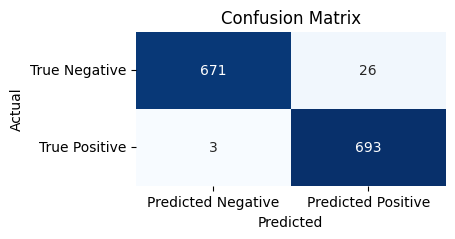

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.9791816223977028


In [40]:
print(y_pred[1:6000:2])

[0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0
 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 0 1 1 0 1 1 1 

### Prediction Pipeline

In [41]:
import pickle
with open("best_model/Random_forest.pkl", "wb") as file:
    pickle.dump(rf, file)

In [42]:
def get_save_file(file_path:str):

    with open(file_path, "rb") as file:
        output = pickle.load(file)

    return output

In [43]:
best_scaler = get_save_file("best_model/standard_scaler.pkl")
best_model = get_save_file("best_model/Random_forest.pkl")
encoded_onehot = get_save_file("best_model/encoded_onehot.pkl")

In [44]:
user_input = np.array([[66, 25, 0, 0, 1, 240, 150, 27.64, 85, 77, 0, 1]])

model_output = best_model.predict(
    best_scaler.transform(
        user_input
    )
)

C:\Users\hp\OneDrive\Desktop\Projects\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
user_ouput = model_output
print(user_ouput)

[1]
